In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# %matplotlib inline

In [4]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [5]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


In [7]:
list(data.columns)

['Unnamed: 0',
 'movie_title',
 'color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

# Line Plot : Average Facebook Likes per Year

Plot takes in as the first parameter the x axis and the second, the y axis values.

plt.figure(figsize=(15,8)) is just the size of the plot.

In [70]:
like_per_year = data.groupby("title_year")["movie_facebook_likes"].mean()
like_per_year

title_year
0.0        4389.361111
1916.0      691.000000
1920.0        0.000000
1925.0      226.000000
1927.0    12000.000000
              ...     
2012.0    24259.004525
2013.0    25115.805907
2014.0    19850.422925
2015.0    19775.920354
2016.0    17610.669811
Name: movie_facebook_likes, Length: 92, dtype: float64

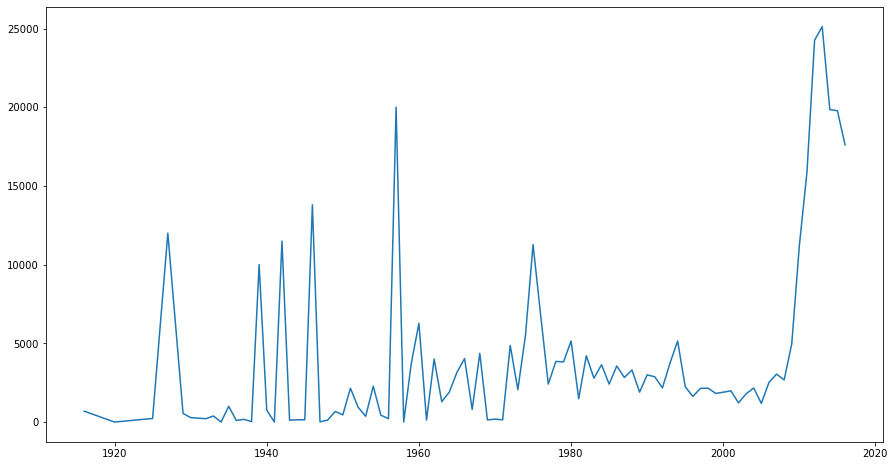

In [71]:
fig = plt.figure(figsize=(15,8))
years = like_per_year.index.tolist()[1:]
likes = like_per_year[1:]
plt.plot(years, likes)
plt.show()

# Scatterplot: Gross VS Budget

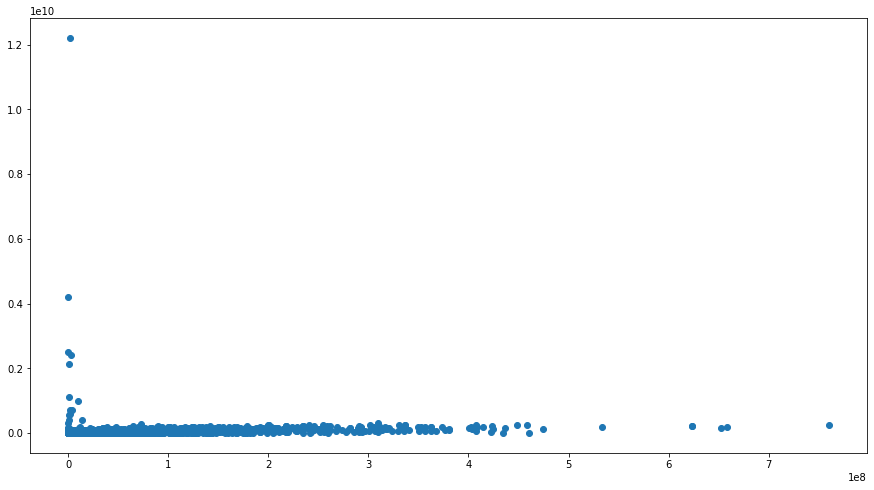

In [72]:
fig = plt.figure(figsize=(15,8))
plt.scatter(data["gross"], data["budget"])
plt.show()

# Matplotlib: Histogram of IMDB Scores

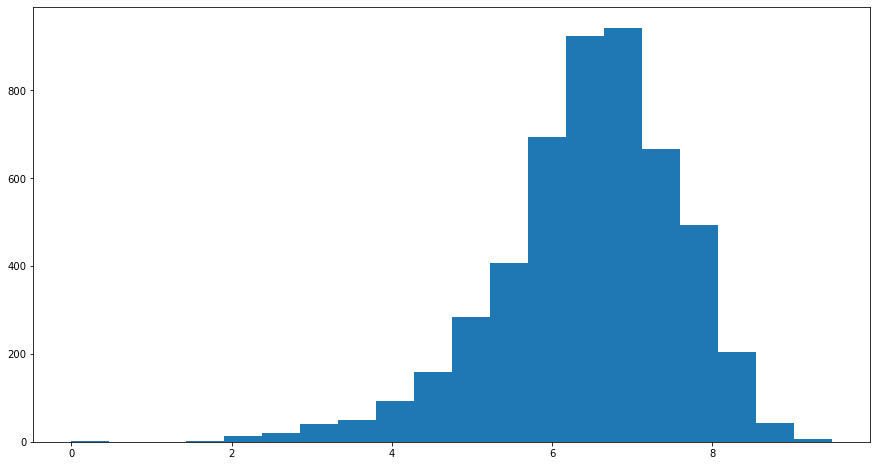

In [73]:
fig = plt.figure(figsize=(15,8))
plt.hist(data["imdb_score"], bins=20)
plt.show()

# Pandas : Barplot of the gross earnings of the 10 movies with highest budget superimposed with their budget as a line graph

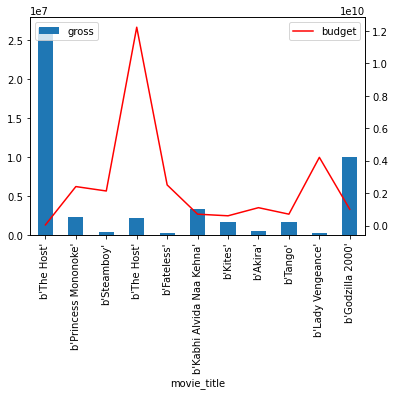

In [74]:
top_budget = data.sort_values(by="budget", ascending=False)["movie_title"][:10].tolist()
top_budget_data = data[data["movie_title"].isin(top_budget)]

ax1 = top_budget_data.plot(x="movie_title", y="gross", kind="bar")
ax2 = ax1.twinx()
top_budget_data.plot(x="movie_title", y="budget", kind="line", color='red', ax = ax2)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# Plot the histograms of imdb_scores according to different content rating Types  
We're finding out which content type tends to have the higher imdb_score.

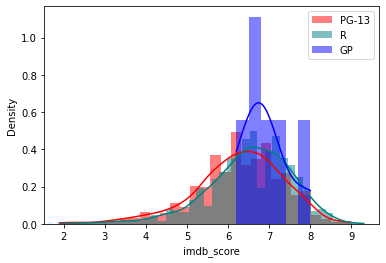

In [84]:
ax = sns.histplot(data[data['content_rating'] == 'PG-13']["imdb_score"], color="red", label="PG-13", kde=True, stat="density", linewidth=0)
sns.histplot(data[data['content_rating'] == 'R']["imdb_score"], color="teal", label="R", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['content_rating'] == 'GP']["imdb_score"], color="blue", label="GP", kde=True, stat="density", linewidth=0, ax=ax)
ax.legend()

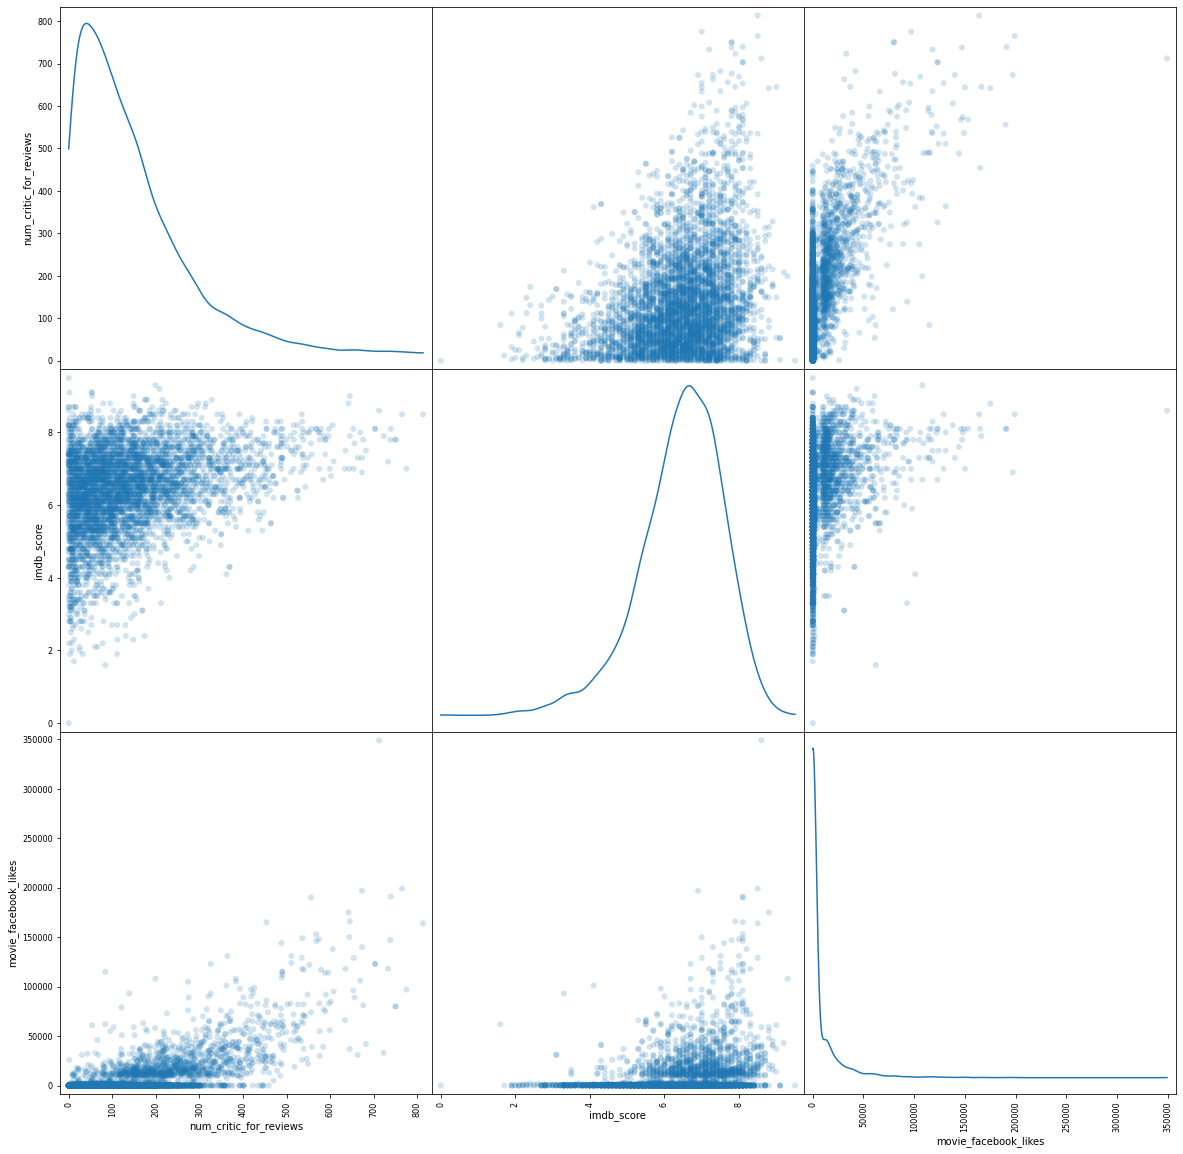

In [91]:
from pandas.plotting import scatter_matrix

cols = ["num_critic_for_reviews", "imdb_score", "movie_facebook_likes"]
scatter_matrix(data[cols], alpha=0.2, figsize=(20, 20), 
               diagonal='kde', marker='o')
plt.show()

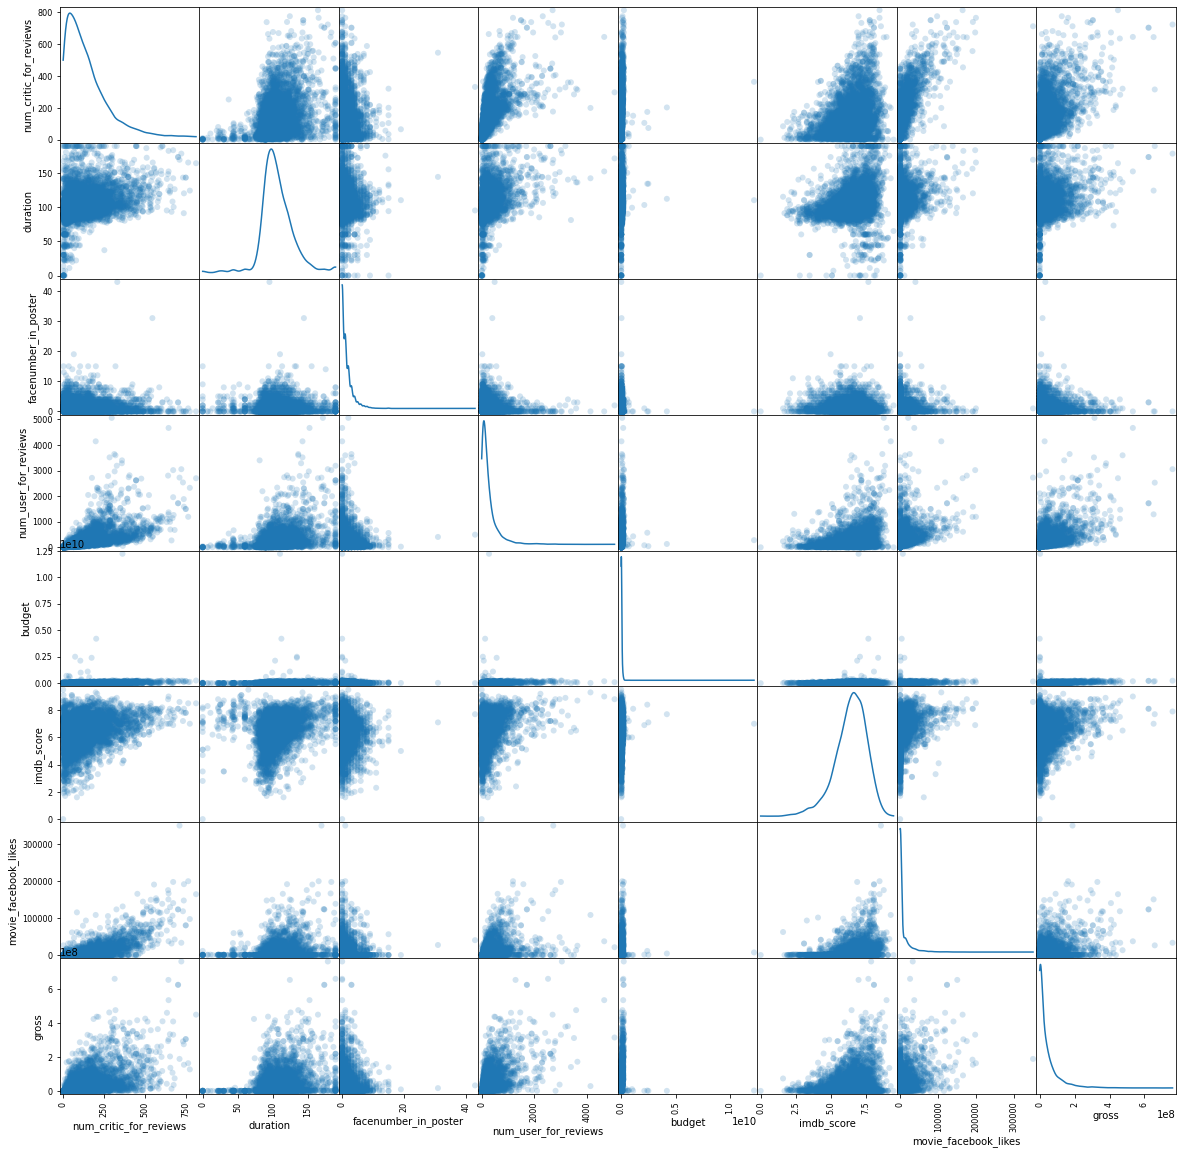

In [93]:
cols = ["num_critic_for_reviews", "duration", "facenumber_in_poster", 
        "num_user_for_reviews", "budget", "imdb_score", "movie_facebook_likes", "gross"]
scatter_matrix(data[cols], alpha=0.2, figsize=(20, 20), 
               diagonal='kde', marker='o')
plt.show()

# Seaborn: Line Plot with Regression : Voted users and reviews

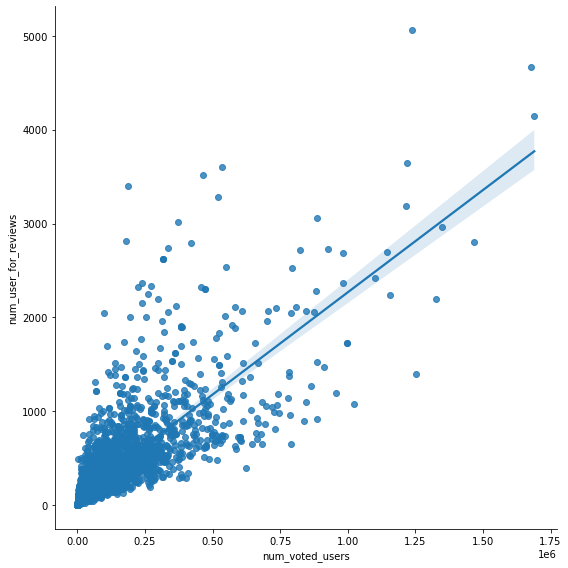

In [96]:
sns.lmplot(x="num_voted_users", 
           y="num_user_for_reviews",
           data=data, height=8)

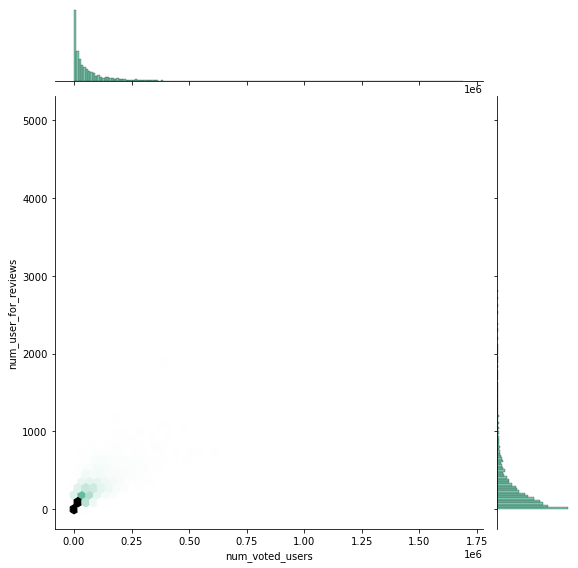

In [99]:
sns.jointplot(x="num_voted_users", y="num_user_for_reviews", data=data, height=8,
             kind="hex", color="#4CB391")

# Seaborn : Barplot of the gross earnings of the last 10 years

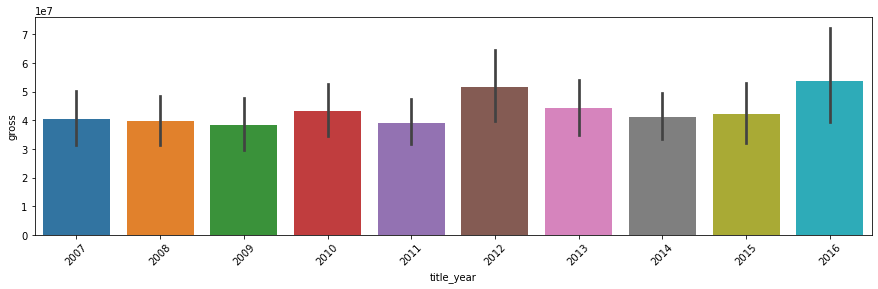

In [100]:
data["title_year"] = data["title_year"].astype(np.int64)
latest_10_years = np.sort(data["title_year"].unique())[-10:]

top_budget = data.sort_values(by="budget", ascending=False)["movie_title"][:10].tolist()
top_budget_data = data[data["movie_title"].isin(top_budget)]

latest_movies_data=data[data["title_year"].isin(latest_10_years)]

plt.figure(figsize=(15,4))
sns.barplot(x="title_year", y="gross", data=latest_movies_data)
plt.xticks(rotation=45)
plt.show()